In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Task 1: Merging data into a single file

In [2]:
df = pd.read_csv('./Sales_2019/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_2019')]   # this syntax is being used for reading all files in a directory
All_Month = pd.DataFrame()   # creating empty dataframe to store csv files within

for file in files:
    df = pd.read_csv('./Sales_2019/'+file)
    #print(file)
    All_Month = pd.concat([All_Month, df])

All_Month.to_csv('data', index=False)  # .to_csv is being used to creat csv file from a dataframe


In [3]:
all_data = pd.read_csv('data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Task 2: Cleaning up the data

In [4]:
nan = all_data[all_data.isna().any(axis=1)] # this syntax is to find any NAN's in your rows
nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_data = all_data.dropna(axis=0, how='all') # read the documents for dropna
all_data.head()  # 'all' will only remove rows with NaN values in all of it's cells 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
# clean rows with or's
def_or = all_data[all_data['Order Date'].str[0:2] == 'Or'] # to see rows containing Or in order date
def_or.head()  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Augment data with additional columns

#### Task 3: Add month column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int') # astype is a dataframe method for type conversion
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 4: Add a sales column

In [9]:
# all_data[['Price Each', 'Quantity Ordered']] = all_data[['Price Each', 'Quantity Ordered']].astype('float')
# all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# another way to do it

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # convert to int , downcast='signed' is to get integer values
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # covert to float
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Q_1: What was the best month for sales? How much was earned that month?

In [10]:
all_data.groupby('Month').sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

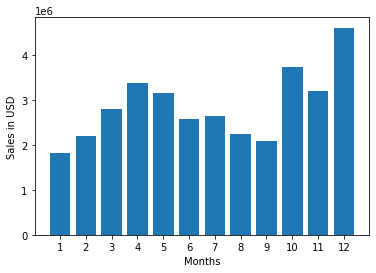

In [11]:
results = all_data.groupby('Month').sum()
months = range(1,13)
plt.bar( months, results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()
# look for how to get conclusions from plots or data in general

## Q_2: What city had the highest number of sales?

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_region(region):
    return region.split(',')[2]


all_data['Cities'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)},({get_region(x)[1:3]})" )
# you can make any fun. and arrly it to dataframes through apply method
# apply method is not the best for Big Data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,(TX)"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,(MA)"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,(CA)"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,(CA)"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,(CA)"


In [13]:
results = all_data.groupby('Cities').sum()['Sales']
results.head(15)

Cities
 Atlanta,(GA)          2795498.58
 Austin,(TX)           1819581.75
 Boston,(MA)           3661642.01
 Dallas,(TX)           2767975.40
 Los Angeles,(CA)      5452570.80
 New York City,(NY)    4664317.43
 Portland,(ME)          449758.27
 Portland,(OR)         1870732.34
 San Francisco,(CA)    8262203.91
 Seattle,(WA)          2747755.48
Name: Sales, dtype: float64

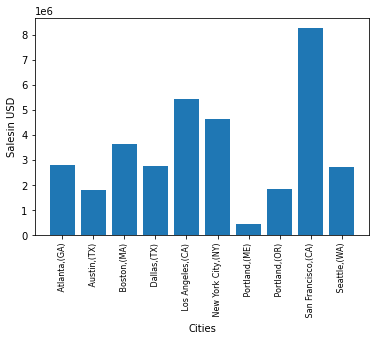

In [14]:
# cities = all_data.unique() >> this syntax will get you the unique values but it will be misordered
cities = [city for city, df in all_data.groupby('Cities')]   # >> this syntax will get you the unique values in order

plt.bar(cities, results)
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('Cities')
plt.ylabel('Salesin USD')
plt.show()

## Q_3: What time should we display advertisements to maximize likelihood of customers to buy products?

In [15]:
# you don't have to import datetime library. use the built_in one in pandas
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])        # heavy computations and large storage for big data. Be careful
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,(TX)",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,(MA)",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,(CA)",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,(CA)",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,(CA)",9,27


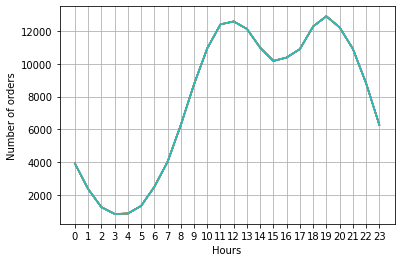

In [16]:
# this chart is for all cities,>>> make another one for each specific city >>>
hours = [hour for hour, df in all_data.groupby('Hour')] 
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()




## Q_4: What products are most often sold together?

In [17]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] # keep=False is to keep all the duplicates
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_10652\129922803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_sublist = row.split(',')
    count.update(Counter(combinations(row_sublist, 2)))  # to find the most common 2 orderd together

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Q_5: What product sold most?, and why do you think it sold most?

C:\Users\moham\AppData\Local\Temp\ipykernel_10652\1468211847.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Prods, rotation='vertical', size=8)


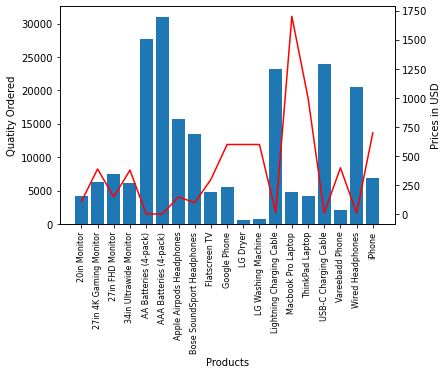

In [20]:
prod_qun = all_data.groupby('Product').sum()['Quantity Ordered']
Prods = [prod for prod, df in all_data.groupby('Product')]   # >> this syntax will get you the unique values in order

prices = all_data.groupby('Product').mean()['Price Each']


# Plotting
fig, ax1= plt.subplots()
ax2 = ax1.twinx()
ax1.bar(Prods, prod_qun)
ax2.plot(Prods, prices, 'r-')
ax1.set_xticklabels(Prods, rotation='vertical', size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quatity Ordered')
ax2.set_ylabel('Prices in USD')
plt.show()
